In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# loading Iris Dataset

In [59]:
iris = datasets.load_iris()

In [60]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [61]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Initiating and fitting PCA Model

Here I am passing the first four columns of my dataframe to the PCA.

In [72]:
model = PCA()

In [73]:
model.fit(df.iloc[:,0:4])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Let us check the Mean of each column

In [74]:
mean = model.mean_
mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

### Let us check the first principal component of our decorrelated components after fitting the data to PCA

In [65]:
first_pc = model.components_[0,:]
first_pc

array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])

In [67]:
transformed = model.transform(df.iloc[:,0:4])

In [68]:
print(transformed)

[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]
 [-2.28085963e+00  7.41330449e-01  1.68677658e-01  2.42008576e-02]
 [-2.82053775e+00 -8.94613845e-02  2.57892158e-01  4.81431065e-02]
 [-2.62614497e+00  1.63384960e-01 -2.18793179e-02  4.52978706e-02]
 [-2.88638273e+00 -5.78311754e-01  2.07595703e-02  2.67447358e-02]
 [-2.67275580e+00 -1.13774246e-01 -1.97632725e-01  5.62954013e-02]
 [-2.50694709e+00  6.45068899e-01 -7.53180094e-02  1.50199245e-02]
 [-2.61275523e+00  1.47299392e-02  1.02150260e-01  1.56379208e-01]
 [-2.78610927e+00 -2.35112000e-01 -2.06844430e-01  7.88791149e-03]
 [-3.22380374e+00 -5.11394587e-01  6.12996725e-02  2.16798118e-02]
 [-2.64475039e+00  1.17876464e+00 -1.51627524e-01 -1.59209718e

### The first principal component
The first principal component of the data is the direction in which the data varies the most. let us represent it as an arrow on the scatter plot.


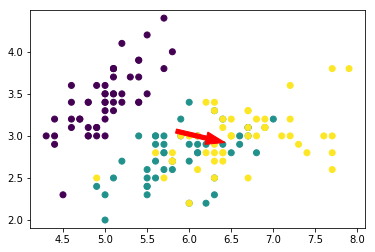

In [84]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.iloc[:,-1])
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.05)
plt.axis('equal')
plt.show()

### Variance of the PCA features
The iris is 4-dimensional. But what is its intrinsic dimension? lets Make a plot of the variances of the PCA features to find out. 

In [76]:
features = range(model.n_components_)
features

range(0, 4)

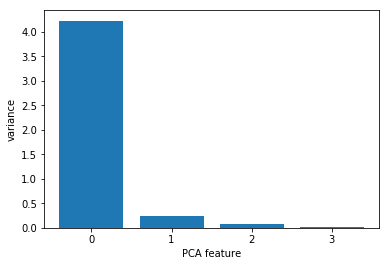

In [77]:
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

As we can see in the graph only the first two features has the significant variance that can be considered. Now use PCA for dimensionality reduction of the iris dataset, retaining only the 2 most important components

In [78]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(df.iloc[:,0:4])

# Transform the scaled samples: pca_features
pca_features = pca.transform(df.iloc[:,0:4])

# Print the shape of pca_features
print(pca_features.shape)

(150, 2)


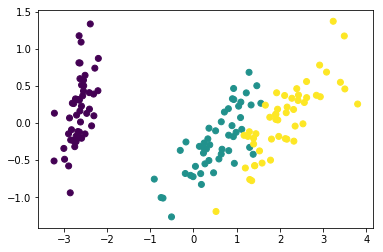

In [79]:
xs = pca_features[:,0]
ys = pca_features[:,1]

plt.scatter(xs, ys, c = df.iloc[:,-1])
plt.show()